In [3]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import time

# Optimal stopping of a die #1

You can roll a die and cumulate a budget by summing all the face values, until it shows $n$, and you lose everything. Find an optimal stopping rule to generate the best average return.

Say we are after the $i$-th roll, and should choose if it is the case to roll again. One can think in terms of value function. If the present payoff $f(b)$ ($b$ is the budget) is larger than the value function $v(b)$, then it is better to stop. The payoff can be set to be the budget itself. The value function may be the expected budget at the next draw. So, we stop if ($X_i$ is the result of the $i$-th roll):
$$ b \ge \mathbb E[b+X_{i+1}]=\mathbb E[b+X_{i+1}|X_{i+1}\ne n]\mathbb P(X_{i+1}\ne n)+0\cdot \mathbb P(X_{i+1}= n).$$

Say the die is 6 faced. Then:
$$ b \ge \mathbb E[b+X_{i+1}|X_{i+1}\ne n]\frac 56=\frac 56b+\frac 56\frac{1+2+3+4+5+6-n}5\Rightarrow b \geq 21-n.$$
It is clear that it is never convenient to push too much, because before or after you lose. Also, when $n$ is large, one wants to stop before. It is simple to understand why: the single roll yields a smaller expected victory, and the expected number to steps to failure is anyway 6, so you want to stop at a smaller budget.

How to compute the expected number of rolls. Take the single roll of a $d$-faced die as a Bernoullian variable, with probability $\frac 1d$ of failure. Then, the number of rolls is geometrically distributed, and its expectation is equal to $d$.

In [13]:
def gioca(partite,stopper,strategia):
    media_vincita = 0
    for i in range(0,partite):
        budget = 0
        while True:
            tiro =  np.random.random_integers(1,6)
            if tiro == stopper:
                break
            budget += tiro
            if budget >= strategia:
                media_vincita += budget
                break
    media_vincita /= partite
    return media_vincita

Time elapsed:  208.151428937912  seconds


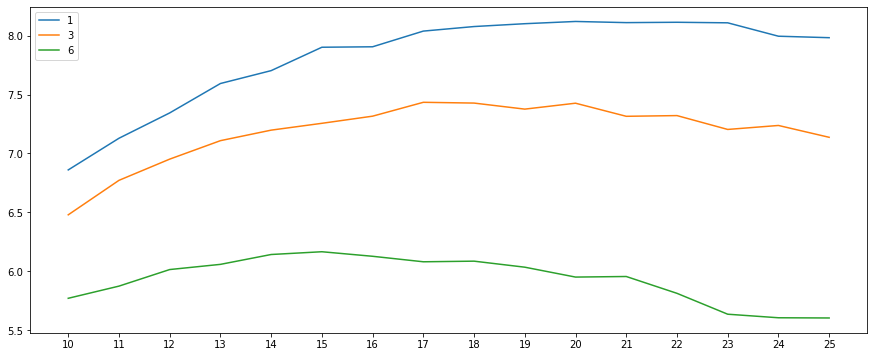

In [27]:
partite = 100000

start = time.time()
risultati = { j:[ gioca(partite, j, i) for i in range(10, 26) ] for j in [1,3,6] }
print('Time elapsed: ', time.time() - start, ' seconds')

plt.figure(figsize=(15,6))
for j in [1, 3, 6]:
    plt.plot([i for i in range(10,26)],risultati[j],label=str(j))
plt.xticks([i for i in range(10,26)])
plt.legend()
plt.show()